# Exercises from Hogg et al. 2010

## Chapter 1

### Problem1

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import pandas as pd
import emcee
%matplotlib inline

In [3]:
emcee.__version__

'2.2.1'

In [4]:
df = pd.DataFrame(np.array([[201,592,61,9,-0.84],
                            [244,401,25,4,0.31],
                            [47,583,38,11,0.64],
                            [287,402,15,7,-0.27],
                            [203,495,21,5,-0.33],
                            [58,173,15,9,0.67],
                            [210,479,27,4,-0.02],
                            [202,504,14,4,-0.05],
                            [198,510,30,11,-0.84],
                            [158,416,16,7,-0.69],
                            [165,393,14,5,0.30],
                            [201,442,25,5,-0.46],
                            [157,317,52,5,-0.03],
                            [131,311,16,6,0.50],
                            [166,400,34,6,0.73],
                            [160,337,31,5,-0.52],
                            [186,423,42,9,0.90],
                            [125,334,26,8,0.40],
                            [218,533,16,6,-0.78],
                            [146,344,22,5,-0.56]
                            ]),index=np.arange(1,21),columns=('x','y','s_x','s_y','rho_xy'))

In [5]:
df

,x,y,s_x,s_y,rho_xy
1,201.0,592.0,61.0,9.0,-0.84
2,244.0,401.0,25.0,4.0,0.31
3,47.0,583.0,38.0,11.0,0.64
4,287.0,402.0,15.0,7.0,-0.27
5,203.0,495.0,21.0,5.0,-0.33
6,58.0,173.0,15.0,9.0,0.67
7,210.0,479.0,27.0,4.0,-0.02
8,202.0,504.0,14.0,4.0,-0.05
9,198.0,510.0,30.0,11.0,-0.84
10,158.0,416.0,16.0,7.0,-0.69


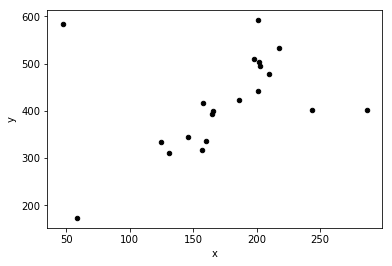

In [6]:
df.plot.scatter(x='x',y='y',c='k')

In [7]:
x1 = df['x'][4::]
y1 = df['y'][4::]

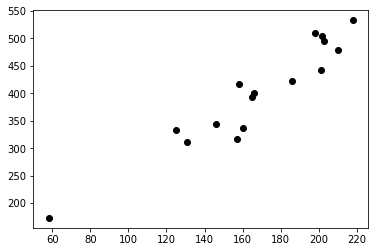

In [8]:
plt.scatter(x1,y1,c='k')

In [9]:
Y = np.array(y1)
A = np.zeros((len(x1),2))
for i in range(len(x1)):
    A[i][0] = 1
    A[i][1] = x1[i+5]

C = np.diag(df['s_y'][4::] ** 2)

In [10]:
from numpy import linalg as la
X1 = la.inv(np.matmul(np.matmul(A.transpose(),la.inv(C)), A))
X2 = np.matmul(np.matmul(A.transpose(),la.inv(C)), Y)
X = np.matmul(X1,X2)
print(X)

[3.81861706 2.33013017]


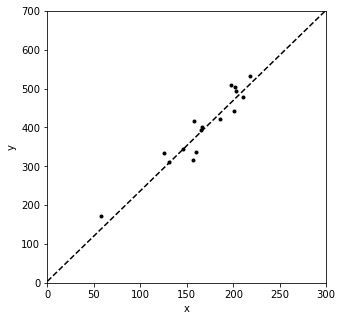

In [11]:
plt.figure(figsize=(5,5))
plt.scatter(x1,y1,c='k',marker='.')
dom = np.linspace(0,300)
plt.plot(dom,X[1]*dom + X[0],c='k',ls='--')
plt.xlim(0,300)
plt.ylim(0,700)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('fig1_1.pdf')

### Problem 2

In [12]:
x = df['x']
y = df['y']

In [13]:
Y = np.array(y)
A = np.zeros((len(x),2))
for i in range(len(x)):
    A[i][0] = 1
    A[i][1] = x[i+1]
C = np.diag(df['s_y'] ** 2)

In [14]:
from numpy import linalg as la
X1 = la.inv(np.matmul(np.matmul(A.transpose(),la.inv(C)), A))
X2 = np.matmul(np.matmul(A.transpose(),la.inv(C)), Y)
X = np.matmul(X1,X2)
print(X)

[250.08215515   0.90783146]


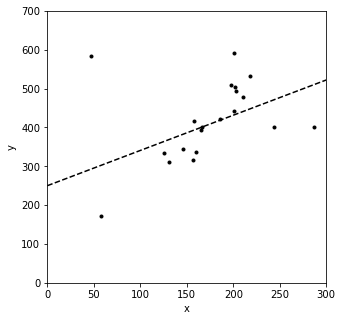

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x,y,c='k',marker='.')
dom = np.linspace(0,300)
plt.plot(dom,X[1]*dom + X[0],c='k',ls='--')
plt.xlim(0,300)
plt.ylim(0,700)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('fig1_2.pdf')

### Problem 3

In [16]:
Y = np.array(y1)
A = np.zeros((len(x1),3))
for i in range(len(x1)):
    A[i][0] = 1
    A[i][1] = x[i+5]
    A[i][2] = x[i+5] ** 2
C = np.diag(df['s_y'][4::] ** 2)

In [17]:
from numpy import linalg as la
X1 = la.inv(np.matmul(np.matmul(A.transpose(),la.inv(C)), A))
X2 = np.matmul(np.matmul(A.transpose(),la.inv(C)), Y)
X = np.matmul(X1,X2)
print(X)

[1.21837764e+02 7.55108148e-01 4.96230052e-03]


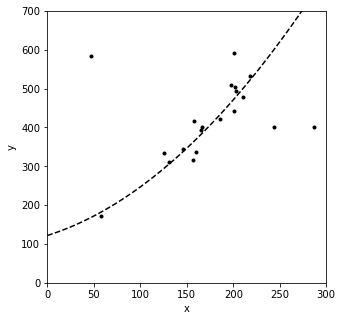

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(x,y,c='k',marker='.')
dom = np.linspace(0,300)
plt.plot(dom,X[2] * dom ** 2 + X[1]*dom + X[0],c='k',ls='--')
plt.xlim(0,300)
plt.ylim(0,700)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('fig1_3.pdf')

## Chapter 2

### Problem 4

$$\mathscr{L} = \Pi_{i=0}^{N} p(y_i|I,m,b)$$

## Chapter 3

### Problem 6

$$\mathscr{L} \propto \Pi_{i=1}^{N} \left[\frac{1-P}{\sqrt{2\pi\sigma_{yi}^2}}exp\left(-\frac{[y_i-mx_i-b]^2}{2\sigma_{yi}^2}\right) + \frac{P}{\sqrt{2\pi[V+\sigma_{yi}^2]}}exp\left(-\frac{[y_i-Y]^2}{2[V+\sigma_{yi}^2]}\right)\right]$$

$$\mathscr{L} \propto \Pi_{i=1}^{N} \left[\frac{1-P}{\sqrt{2\pi\sigma_{yi}^2}}exp\left(\alpha\right) + \frac{P}{\sqrt{2\pi[V+\sigma_{yi}^2]}}exp\left(\beta\right)\right]$$

In [6]:
x = df['x']
y = df['y']
s_y = df['s_y']

In [7]:
#Some borrowed MCMC plotting code from: 
#http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/
def compute_sigma_level(trace1, trace2, nbins=20):
    """From a set of traces, bin by number of standard deviations"""
    L, xbins, ybins = np.histogram2d(trace1, trace2, nbins)
    L[L == 0] = 1E-16
    logL = np.log(L)

    shape = L.shape
    L = L.ravel()

    # obtain the indices to sort and unsort the flattened array
    i_sort = np.argsort(L)[::-1]
    i_unsort = np.argsort(i_sort)

    L_cumsum = L[i_sort].cumsum()
    L_cumsum /= L_cumsum[-1]
    
    xbins = 0.5 * (xbins[1:] + xbins[:-1])
    ybins = 0.5 * (ybins[1:] + ybins[:-1])

    return xbins, ybins, L_cumsum[i_unsort].reshape(shape)


def plot_MCMC_trace(ax, xdata, ydata, trace, scatter=False, **kwargs):
    """Plot traces and contours"""
    xbins, ybins, sigma = compute_sigma_level(trace[0], trace[1])
    ax.contour(xbins, ybins, sigma.T, levels=[0.683, 0.955], **kwargs)
    if scatter:
        ax.plot(trace[0], trace[1], ',k', alpha=0.1)
    ax.set_xlabel('b')
    ax.set_ylabel('m')
    
    
def plot_MCMC_model(ax, xdata, ydata, trace):
    """Plot the linear model and 2sigma contours"""
    ax.plot(xdata, ydata, 'ok')

    b, m = trace[:2]
    xfit = np.linspace(xdata.min(), xdata.max(), 10)
    yfit = b[:, None] + m[:, None] * xfit
    mu = yfit.mean(0)
    sig = 2 * yfit.std(0)

    ax.plot(xfit, mu, '-k')
    ax.fill_between(xfit, mu - sig, mu + sig, color='lightgray')

    ax.set_xlabel('x')
    ax.set_ylabel('y')


def plot_MCMC_results(xdata, ydata, trace, colors='k'):
    """Plot both the trace and the model together"""
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    plot_MCMC_trace(ax[0], xdata, ydata, trace, True, colors=colors)
    plot_MCMC_model(ax[1], xdata, ydata, trace)

In [22]:
#Defining (flat) priors 
def log_prior(theta):
    
    m, b, P, Y, V = theta
    if 0.5 < m < 5.0 and -100.0 < b < 100.0 and 0.0 < P < 1.0 and 0.0 < Y < 700.0 and 1.0 < V < 40.0:
        return 0.0
    return -np.inf

#Mixture model from Ch. 3
def log_likelihood(theta, x, y, s_y):
    
    m, b, P, Y, V = theta
    
    model = m * x + b
    
    exp1 = -(y - model)**2 / (2 * s_y**2)
    
    exp2 = -((y - Y)**2) / (2*(V + s_y**2))
    
    return np.sum(np.log(((1-P)/np.sqrt(2*np.pi*s_y**2)) * np.exp(exp1) 
                                + (P/np.sqrt(2*np.pi*(V+s_y**2))) * np.exp(exp2)))

    
#Posterior output
def log_posterior(theta, x, y, s_y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, s_y)

In [23]:
###MCMC

init_guess = [3.8, 2.3, 0.05, 350, 5.0] #Choosing some reasonable initalization in the 5-D parameter space

ndim = 5 #dimension of param space
nwalkers = 32 #number of walkers
nburn = 500 #burn-in steps
nsteps = 2000 #production steps

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, s_y))

#Burn-in
print("Running burn-in...")
p0 = init_guess + 1e-4 * np.random.randn(nwalkers, ndim)
p0,_,_ = sampler.run_mcmc(p0, nburn)

#Production
print("Running production...")
sampler.reset()
sampler.run_mcmc(p0, nsteps);

Running burn-in...


/Users/Riley/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Running production...


In [24]:
#Flattening the sample chain
samples = sampler.flatchain
print(samples.shape)

(64000, 5)


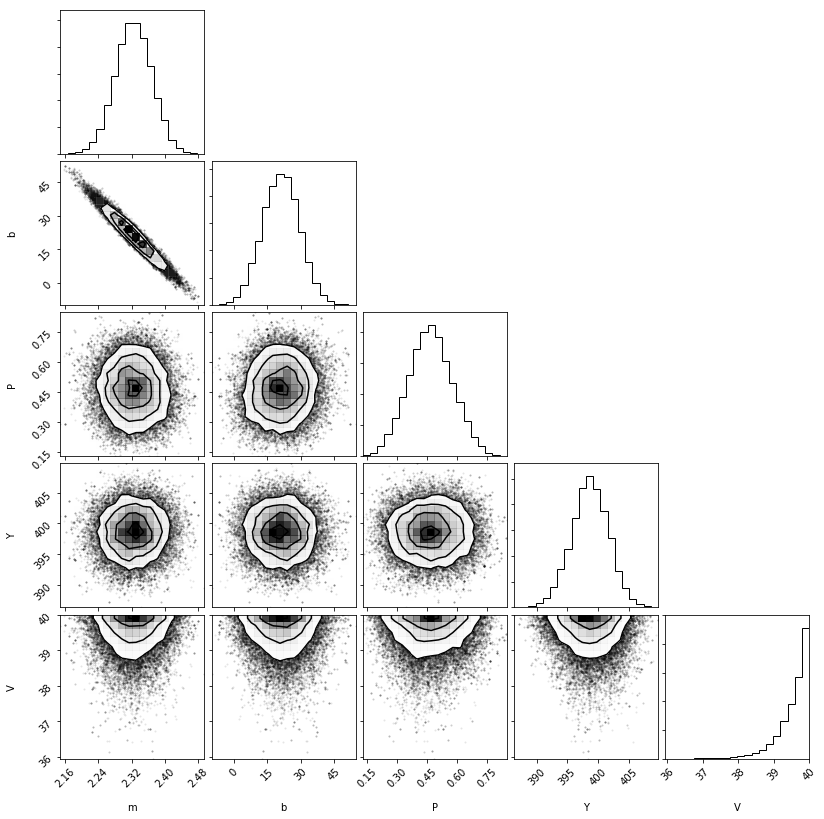

In [25]:
#the "corner" package lets us visualize the posterior distributions of all our parameters at once
import corner
fig = corner.corner(samples[:, (0,1,2,3,4)], labels=['m','b','P','Y','V']);
plt.savefig('Figures/prob6_corner.png')

(2000, 32)


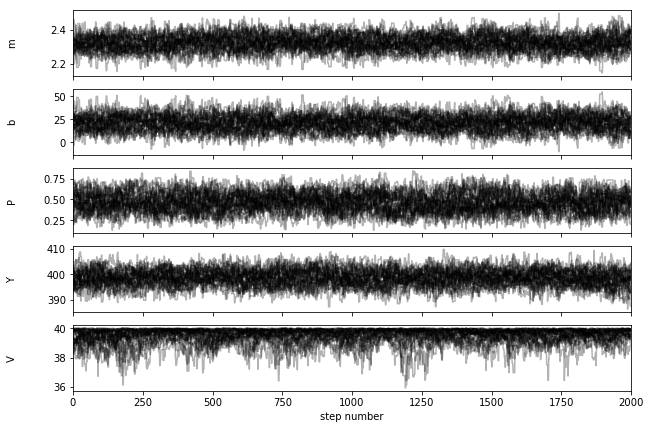

In [28]:
#Plotting the walkers
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
labels = ["m", "b", "P", "Y", "V"]
sample_chain = np.transpose(sampler.chain)
print(sample_chain[0, :, :].shape)

for i in range(ndim):
    ax = axes[i]
    ax.plot(sample_chain[i, :, :], "k", alpha=0.3)
    ax.set_xlim(0, 2000)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
plt.savefig('Figures/prob6_walkers.png')

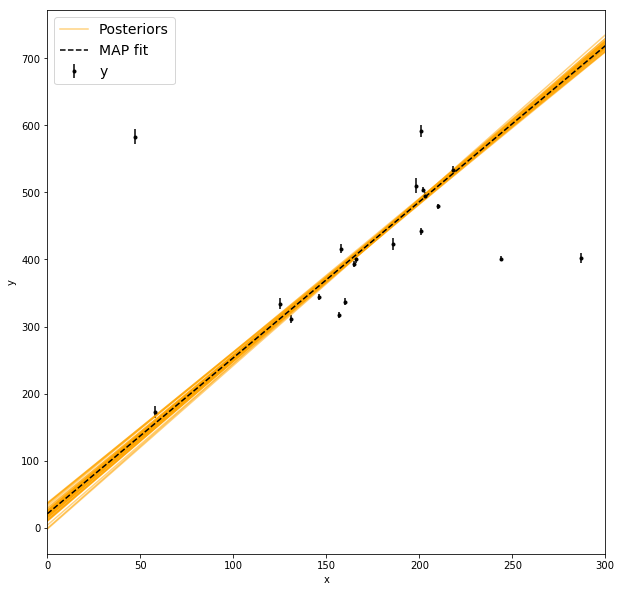

In [26]:
#Plotting the posterior fits against the data
plt.figure(figsize=(10,10))
map_m = samples[:,0].mean()
map_b = samples[:,1].mean()
samples[:,1].mean()
inds = np.random.randint(len(samples), size=50)
x0 = np.linspace(0,300,300)
for ind in inds:
    sample = samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "orange", alpha=0.5)
plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "orange", alpha=0.5, label='Posteriors')
plt.errorbar(x, y, yerr=s_y, fmt=".k", capsize=0)
plt.plot(x0, map_m * x0 + map_b, 'k--', label = 'MAP fit')
plt.legend(fontsize=14)
plt.xlim(0, 300)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('Figures/prob6_posts.png')

In [27]:
# Parameter uncertainties based on the 16th, 50th, and 84th percentiles 
# of the samples from the marginalized distributions
from IPython.display import display, Math
labels=['m','b','P','Y','V']
for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>